<a href="https://colab.research.google.com/github/muriloamo/googlecolab-posgradua/blob/main/PORTIFOLIO_P%C3%93S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Despesas2024.xlsx')

In [ ]:
df.head(989)

,MÊS,CONTAS,HISTÓRICO,VALOR,TIPO CONTA
0,JANEIRO,DESPESAS CABO FRIO,COND ED JOSE AMERICO MACEDO,1282.25,F
1,JANEIRO,DESPESAS HRQ,Cond Santa Marta - Henrique - PG,1393.80,F
2,JANEIRO,DESPESAS BH,Cond Zeni Moreira - pacto - PG,2826.31,F
3,JANEIRO,DESPESAS CABO FRIO,internet - Nova costa - ref 15/11/23,92.92,F
4,JANEIRO,DESPESAS CABO FRIO,internet - Nova costa - ref 15/12/23,92.92,F
...,...,...,...,...,...
984,OUTUBRO,DESPESAS VRG,LUCAS,40.00,V
985,OUTUBRO,DESPESAS VRG,GILDELE,60.00,V
986,OUTUBRO,DESPESAS BH,POSTO ARAPONGA - COMBUST,200.00,V
987,OUTUBRO,DESPESAS LBT,LARISSA,250.00,F


In [ ]:
import pandas as pd

def ler_excel(nome_arquivo):
    """Lê um arquivo Excel e retorna um DataFrame."""
    try:
        df = pd.read_excel(nome_arquivo)
        return df
    except FileNotFoundError:
        print(f"Erro: Arquivo '{nome_arquivo}' não encontrado.")
        return None
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        return None

def exibir_menu():
    """Exibe o menu de opções de análise."""
    print("\nMenu de Análise:")
    print("1. Exibir as primeiras linhas (head)")
    print("2. Exibir informações gerais (info)")
    print("3. Exibir estatísticas descritivas (describe)")
    print("4. Contar valores únicos em uma coluna")
    print("5. Calcular a média de uma coluna numérica")
    print("6. Filtrar dados por uma condição")
    print("7. Sair")

def executar_analise(df, opcao):
    """Executa a análise escolhida pelo usuário."""
    if opcao == 1:
        print(df.head())
    elif opcao == 2:
        df.info()
    elif opcao == 3:
        print(df.describe())
    elif opcao == 4:
        coluna = input("Digite o nome da coluna para contagem de valores únicos: ")
        if coluna in df.columns:
            print(df[coluna].value_counts())
        else:
            print("Coluna não encontrada.")
    elif opcao == 5:
        coluna = input("Digite o nome da coluna numérica para calcular a média: ")
        if coluna in df.columns and pd.api.types.is_numeric_dtype(df[coluna]): #verifica se a coluna é numérica
            print(f"Média de {coluna}: {df[coluna].mean()}")
        else:
            print("Coluna não encontrada ou não numérica.")
    elif opcao == 6:
        coluna = input("Digite o nome da coluna para filtrar: ")
        if coluna in df.columns:
            condicao = input(f"Digite a condição para filtrar (ex: {coluna}>10 ou {coluna}=='valor'): ")
            try:
                print(df.query(condicao))
            except Exception as e:
                print(f"Erro na condição: {e}")
        else:
            print("Coluna não encontrada.")
    elif opcao == 7:
        print("Saindo...")
        return False  # Indica para sair do loop
    else:
        print("Opção inválida.")
    return True # Indica para continuar no loop

def main():
    #nome_arquivo = input("Digite o nome do arquivo Excel (ex: dados.xlsx): ")
    df = ler_excel('Despesas2024.xlsx')

    if df is None:
        return  # Sai da função se houver erro na leitura

    continuar = True
    while continuar:
        exibir_menu()
        try:
          opcao = int(input("Escolha uma opção: "))
          continuar = executar_analise(df, opcao)
        except ValueError:
          print("Por favor, digite um número inteiro.")

if __name__ == "__main__":
    main()

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

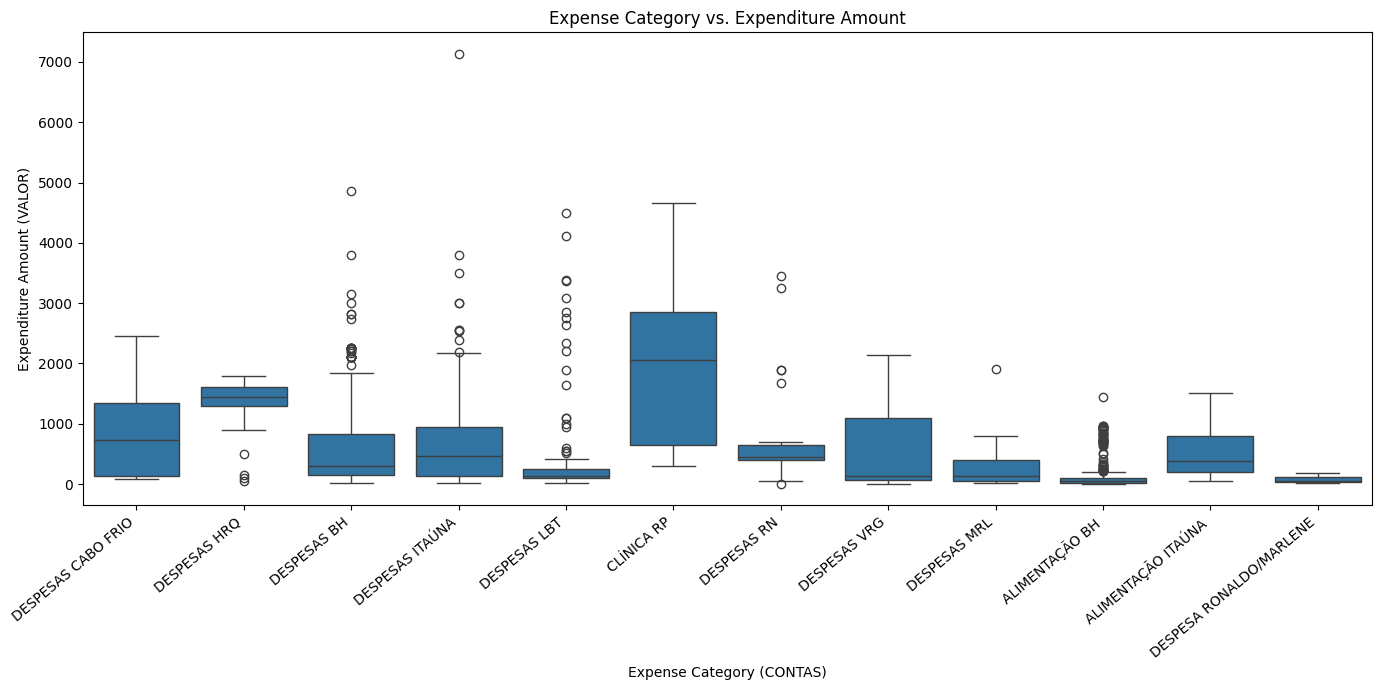

In [ ]:
# @title Expense Category vs. Expenditure Amount

import matplotlib.pyplot as plt
import seaborn as sns

# Create box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='CONTAS', y='VALOR', data=df)
plt.xlabel('Expense Category (CONTAS)')
plt.ylabel('Expenditure Amount (VALOR)')
plt.title('Expense Category vs. Expenditure Amount')
plt.xticks(rotation=40, ha='right')
_ = plt.tight_layout()

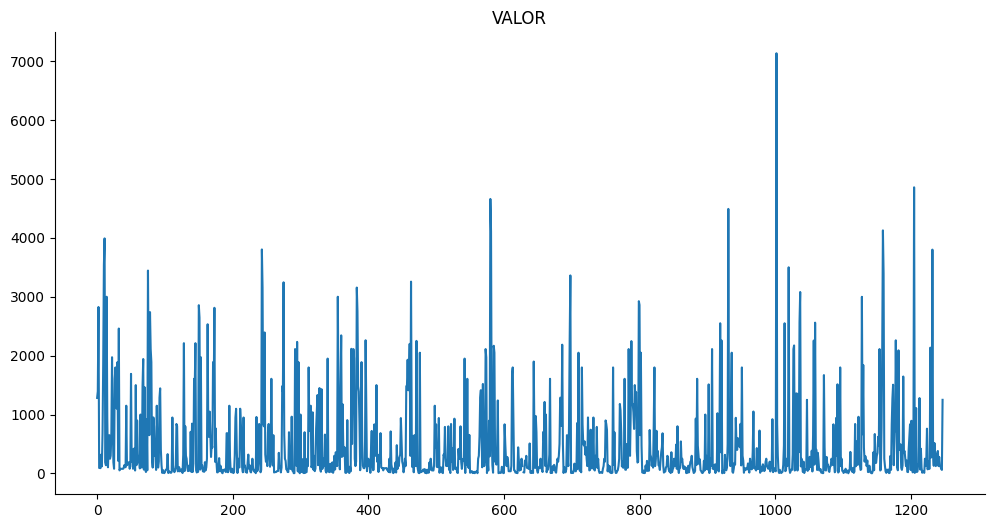

In [ ]:
# @title VALOR

from matplotlib import pyplot as plt
df['VALOR'].plot(kind='line', figsize=(12, 6), title='VALOR')
plt.gca().spines[['top', 'right']].set_visible(False)

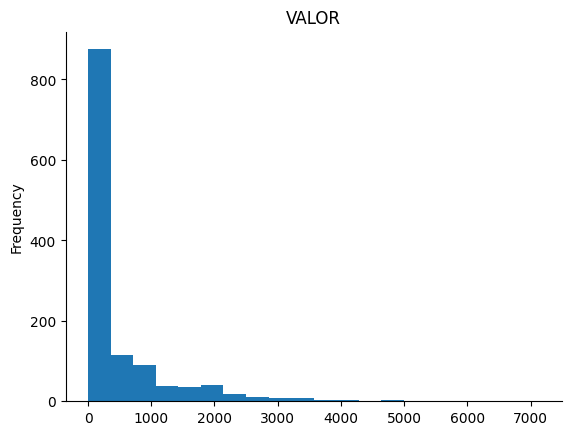

In [ ]:
# @title VALOR

from matplotlib import pyplot as plt
df['VALOR'].plot(kind='hist', bins=20, title='VALOR')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-13-ca3076c5842b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='TIPO CONTA', y='VALOR', inner='box', palette='Dark2')


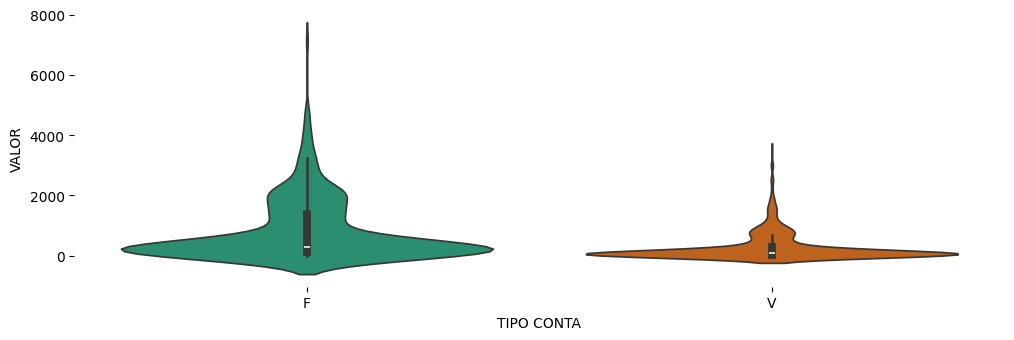

In [ ]:
# @title TIPO CONTA vs VALOR

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['TIPO CONTA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='TIPO CONTA', y='VALOR', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MÊS         1248 non-null   object 
 1   CONTAS      1247 non-null   object 
 2   HISTÓRICO   1248 non-null   object 
 3   VALOR       1247 non-null   float64
 4   TIPO CONTA  1247 non-null   object 
dtypes: float64(1), object(4)
memory usage: 48.9+ KB


In [ ]:
df.describe()

,VALOR
count,1247.000000
mean,458.692213
std,737.143606
min,3.020000
25%,51.740000
50%,130.960000
75%,500.000000
max,7133.790000


In [ ]:
df[(df['CONTAS'] == 'DESPESAS VIRGINIA') & (df['MÊS'] == 'AGOSTO')]

,MÊS,CONTAS,HISTÓRICO,VALOR,TIPO CONTA
715,AGOSTO,DESPESAS VIRGINIA,MINAS TENIS,1800.0,F
730,AGOSTO,DESPESAS VIRGINIA,livro Pedro,86.0,V


In [ ]:
df.groupby('CONTAS')['VALOR'].sum()

,VALOR
CONTAS,
ALIMENTAÇÃO BH,57437.32
ALIMENTAÇÃO ITAÚNA,9625.25
CLÍNICA RP,58481.03
DESPESA RONALDO/MARLENE,243.40
DESPESAS BH,114397.46
DESPESAS CABO FRIO,20575.86
DESPESAS HRQ,41457.59
DESPESAS ITAÚNA,135105.17
DESPESAS LBT,67440.42


<Axes: xlabel='CONTAS'>

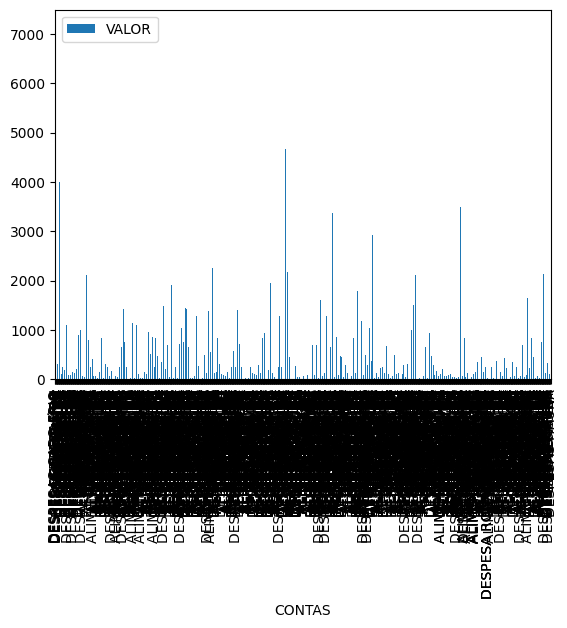

In [ ]:
df.plot(kind='bar', x='CONTAS', y='VALOR')

<Axes: ylabel='count'>

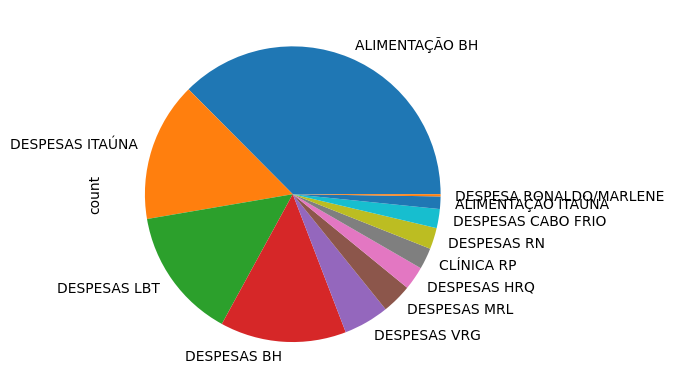

In [ ]:
df['CONTAS'].value_counts().plot(kind='pie')

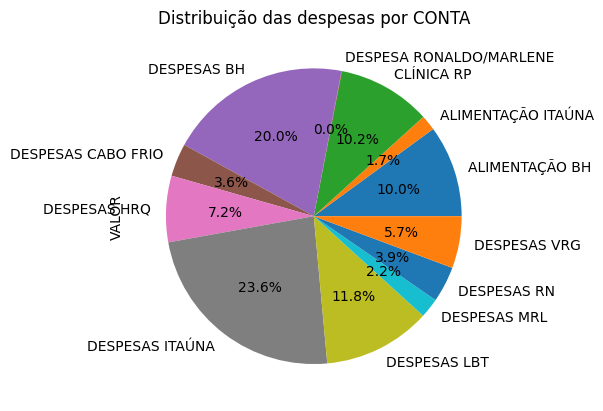

In [ ]:
gastos_por_tipo = df.groupby('CONTAS')['VALOR'].sum()

# Criar um gráfico de pizza
gastos_por_tipo.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição das despesas por CONTA')
plt.show()

In [ ]:
def simple_app(environ, start_response):
    status = '200 OK'
    headers = [('Content-type', 'text/plain')]
    start_response(status, headers)
    return [b"Ola, WSGI!\n"]

class Framework:
    def __init__(self, app):
        self.wsgi_app = app

    def handle_request(self, environ, start_response):
        return self.wsgi_app(environ, start_response)

framework = Framework(simple_app)

# Simula uma requisição (em um cenário real, o servidor WSGI faria isso)
def mock_start_response(status, headers):
    print(f"Status: {status}")
    print("Headers:")
    for header, value in headers:
        print(f"  {header}: {value}")

response = framework.handle_request({}, mock_start_response)
for chunk in response:
    print(f"Body: {chunk.decode()}")

Status: 200 OK
Headers:
  Content-type: text/plain
Body: Ola, WSGI!

